In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

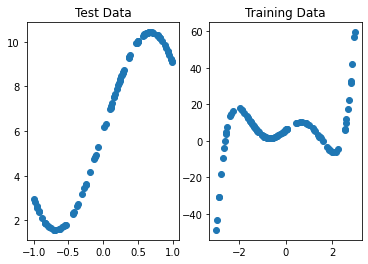

In [9]:
def GraphOfInputData():
    xTest = np.load('/content/drive/MyDrive/x_test.npy')
    yTest = np.load('/content/drive/MyDrive/y_test.npy')
    xTrain = np.load('/content/drive/MyDrive/x_train.npy')
    yTrain = np.load('/content/drive/MyDrive/y_train.npy')

    fig, axs = plt.subplots(1, 2)
    axs[0].scatter(xTest, yTest)
    axs[0].set_title("Test Data")
    axs[1].scatter(xTrain, yTrain)
    axs[1].title.set_text("Training Data")

    plt.show()
    
GraphOfInputData()

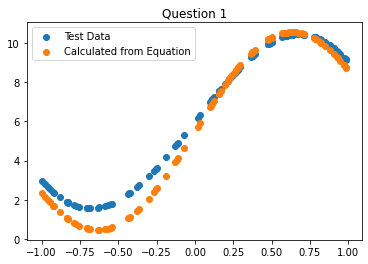

In [ ]:
def equation(x):
    x_Out = np.zeros(len(x))
    for i in range(len(x)):
        temp = .5*x[i]
        x_Out[i] = (temp**3 + 5*math.sin(5*temp))+5.5
    return x_Out

def main():
    x = np.load('x_train.npy')
    y = np.load('y_train.npy')

    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')


    y_calc = equation(x_test)

    plt.scatter(x_test, y_test)
    plt.scatter(x_test, y_calc)
    plt.title("Question 1")
    plt.legend(["Test Data", "Calculated from Equation"])
    plt.show()

main()

In [ ]:
def leastSquare(actual, forcast):
    sum = 0
    for i in range(len(actual)):
        sum += (actual[i] - forcast[i])**2

    return sum/len(actual)

def regressionLine(x, y):
    #output = b0 + b1*x
    # b1 = r sy/sx
    # b0 = avrage(y) - b1*avrage(x)
    # Sx = sqrt(sum(xi-avrage(x))**2)/(len(x)-1)
    # r = (1/n-1) * sum((xi-avrage(x))/sx)(yi-avrage(y))/sy)
    for i in range(len(x)):
        xAvg = np.sum(x)/len(x)
        yAvg = np.sum(y)/len(y)

    xsum = 0
    ysum = 0

    for i in range(len(x)):
        xsum += (x[i] - xAvg)**2
        ysum += (y[i] - yAvg)**2

    sx = ((xsum)/(len(x)))**.5
    sy = ((ysum)/(len(y)))**.5

    sum = 0

    for i in range(len(x)):
        sum += (x[i] - xAvg)/sx * (y[i] - yAvg)/sy

    r = (1/(len(x))) * sum

    b1 = r * sy/sx
    b0 = yAvg - b1*xAvg

    yCalc = np.zeros(len(y))
    for i in range(len(x)):
        yCalc[i] = b0 + b1 * x[i]

    # print("xAvg", xAvg)
    # print("yAvg", yAvg)
    # print("sx", sx)
    # print("sy", sy)
    # print("r", r)
    # print("b1", b1)
    # print("b0", b0)

    return yCalc

def meanSquaredError(x, y):
    # try:
    yForcast = regressionLine(x, y)
    MSE = leastSquare(y, yForcast)
    # except:
        # MSE = "nan"
    # print(MSE)
    return(MSE)


def main2():
    file = pd.read_csv (r'Assignment1_Q2_Data.csv')
    y = pd.DataFrame(file, columns= ["Price (1000$)"]).values

    # print(y.values)

    columnsNameListing = []
    columnsDataListing = []

    for (columnName, columnData) in file.iteritems():
        columnsNameListing.append(columnName)
        columnsDataListing.append(columnData.values)

    # print(columnsNameListing)
    # print(columnsDataListing)

    leastSquareResults = []

    for i in range(1, len(columnsNameListing)-1):
        x = columnsDataListing[i]
        # print(x)
        leastSquareResults.append(meanSquaredError(x, y))

    # print(leastSquareResults)

    for i in range(1, len(columnsNameListing)-1):
        print(columnsNameListing[i], leastSquareResults[i-1])

main2()

Local Price [28.56335311]
Bathrooms [27.87238633]
Land Area [107.38796413]
Living area [29.09665536]
# Garages [152.06157685]
# Rooms [76.53857002]
# Bedrooms [98.41039063]
Age of home [175.9450102]
Construction type [187.49174768]
Architecture type [193.16061475]
# Fire places [146.84583124]


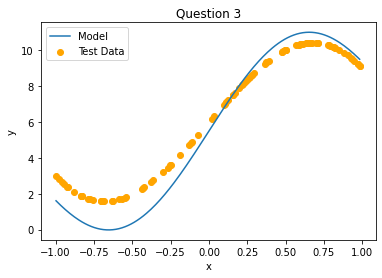

In [ ]:
def equation(w, x):
    x_Out = np.zeros(len(x))
    for i in range(len(x)):
        temp = .5*x[i]
        x_Out[i] = -w * (temp**3 + math.sin(5*temp))+5.5
    return x_Out

def lossFunction(w, x, y):
    return np.sum((equation(w, x) - y)**2)

def gradientFunction(w, x, y):
    gradient = np.sum(2*equation(1, x) * (equation(w, x) - y))
    return gradient

def gradientDescent(wGuess, alpha, iterations, x, y):
    wValues = [wGuess]

    for i in range(iterations):
        gradient = gradientFunction(wValues[-1], x, y)
        wValues.append(wValues[-1] - alpha * gradient)
    
    return wValues


def main3():
    x = np.load('x_train.npy')
    y = np.load('y_train.npy')

    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')

    newWValues = gradientDescent(-1, .0001, 50, x, y)
    
    xRange = np.arange(x_test.min(), x_test.max(), .01)
    yOutput = equation(newWValues[-1], xRange)
    # print(newWValues[-1])
    
    fig, axs = plt.subplots(1)

    axs.plot(xRange, yOutput)
    axs.scatter(x_test, y_test, color="orange")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["Model", "Test Data"])
    plt.title("Question 3")
    # axs.scatter(x, y, color="green")
    plt.show()

main3()
